Take in variables
Breakage chances
old vs new distributions

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
NoTreatment = pd.read_csv("NoTreatmentSortedFormatted.csv", header=None)
Buffer = pd.read_csv("BufferSortedFormatted.csv", header=None)
S1 = pd.read_csv("S1SortedFormatted.csv", header=None)

dfNT = pd.DataFrame(NoTreatment)
dfNT = dfNT.dropna(how = "all")

dfB = pd.DataFrame(Buffer)
dfB = dfB.dropna(how = "all")

dfS1 = pd.DataFrame(S1)
dfS1 = dfS1.dropna(how = "all")

In [4]:
bGRGT = dfB[dfB[0] == "G/R/G/T"]
bGRT = dfB[dfB[0] == "G/R/T"]
bR = dfB[dfB[0] == "Line"]
bG = dfB[dfB[0] == "Length"]

ntGRGT = dfNT[dfNT[0] == "G/R/G/T"]
ntGRT = dfNT[dfNT[0] == "G/R/T"]
ntR = dfNT[dfNT[0] == "Line"]
ntG = dfNT[dfNT[0] == "Length"]
ntRGRT = dfNT[dfNT[0] == "R/G/R/T"]

s1R = dfS1[dfS1[0] == "Line"]
s1G = dfS1[dfS1[0] == "Length"]
s1GRT = dfS1[dfS1[0] == "G/R/T"]

In [15]:
ntRd = lindigestGandR(ntR[1])
ntGd = lindigestGandR(ntG[1])

#hu is red(c)
#chance of breakage increases linearly
#length of segment relative to max segment length
print("Digestion Efficiency R = ", (len(ntR)/len(ntRd)*100))
print("Digestion Efficiency G = ", (len(ntG)/len(ntGd)*100))

Digestion Efficiency R =  74.02912621359224
Digestion Efficiency G =  77.37430167597765


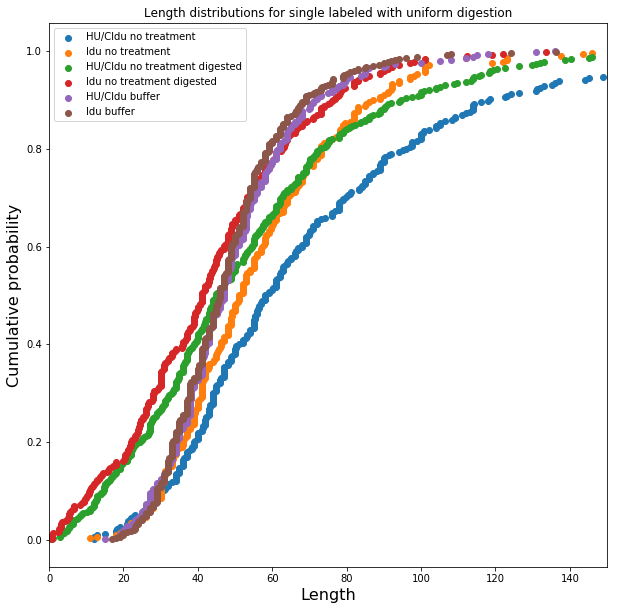

In [16]:
fig1, ax1 = plt.subplots(figsize=(10,10))


x,y = ecdf(ntR[1]) #R no treatment
plt.scatter(x=x, y=y, label = "HU/Cldu no treatment")

x,y = ecdf(ntG[1]) #G no treatment
plt.scatter(x=x, y=y, label = "Idu no treatment")

x,y = ecdf(ntRd) #R no treatment digested
plt.scatter(x=x, y=y, label = "HU/Cldu no treatment digested")

x,y = ecdf(ntGd) #G no treatment digested
plt.scatter(x=x, y=y, label = "Idu no treatment digested")

x,y = ecdf(bR[1]) #R buffer
plt.scatter(x=x, y=y, label = "HU/Cldu buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "Idu buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for single labeled with uniform digestion')
plt.xlim(0, 150)

plt.show()

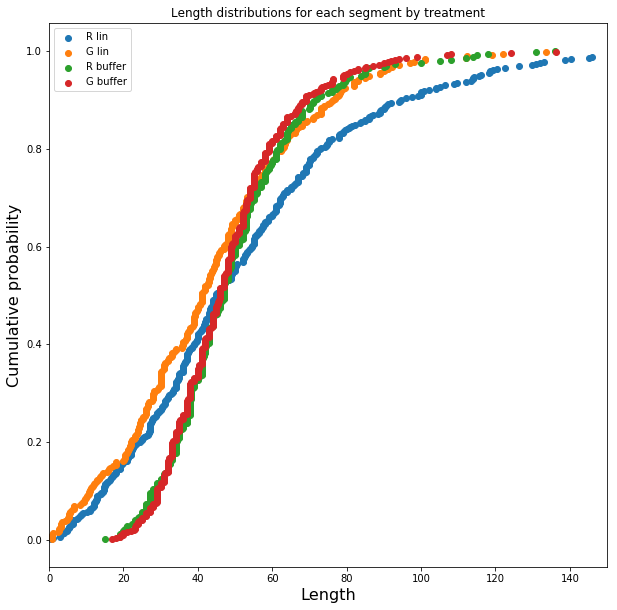

In [17]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntRd) #R no treatment digested
plt.scatter(x=x, y=y, label = "R lin")

x,y = ecdf(ntGd) #G no treatment digested
plt.scatter(x=x, y=y, label = "G lin")

x,y = ecdf(bR[1]) #R S1
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 150)

plt.show()

In [18]:
ntRdexp = expdigestGandR(ntR[1], 1)
ntGdexp = expdigestGandR(ntG[1], 1)

#exponentially getting less likely as segments get long to break, half life more likely to break as it gets longer
print("Digestion Efficiency G = ", (len(ntG)/len(ntGdexp)*100))
print("Digestion Efficiency R = ", (len(ntG)/len(ntGdexp)*100))

Digestion Efficiency G =  74.66307277628033
Digestion Efficiency R =  74.66307277628033


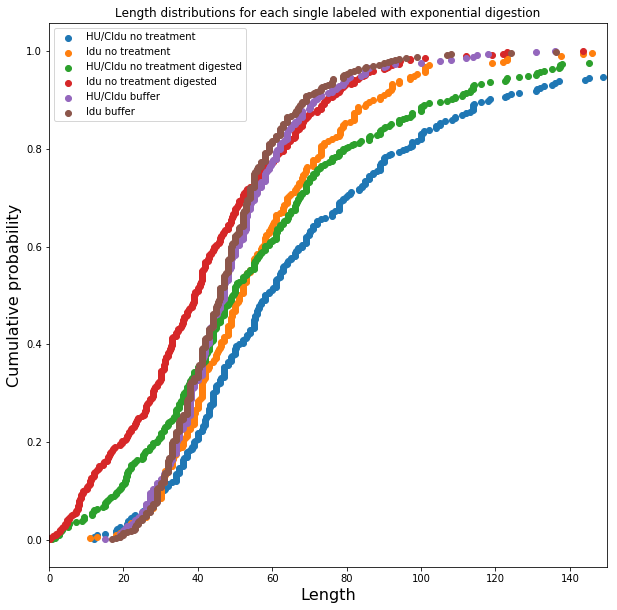

In [19]:
fig1, ax1 = plt.subplots(figsize=(10,10))


x,y = ecdf(ntR[1]) #R no treatment
plt.scatter(x=x, y=y, label = "HU/Cldu no treatment")

x,y = ecdf(ntG[1]) #G no treatment
plt.scatter(x=x, y=y, label = "Idu no treatment")

x,y = ecdf(ntRdexp) #R no treatment digested
plt.scatter(x=x, y=y, label = "HU/Cldu no treatment digested")

x,y = ecdf(ntGdexp) #G no treatment digested
plt.scatter(x=x, y=y, label = "Idu no treatment digested")

x,y = ecdf(bR[1]) #R buffer
plt.scatter(x=x, y=y, label = "HU/Cldu buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "Idu buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each single labeled with exponential digestion')
plt.xlim(0, 150)

plt.show()

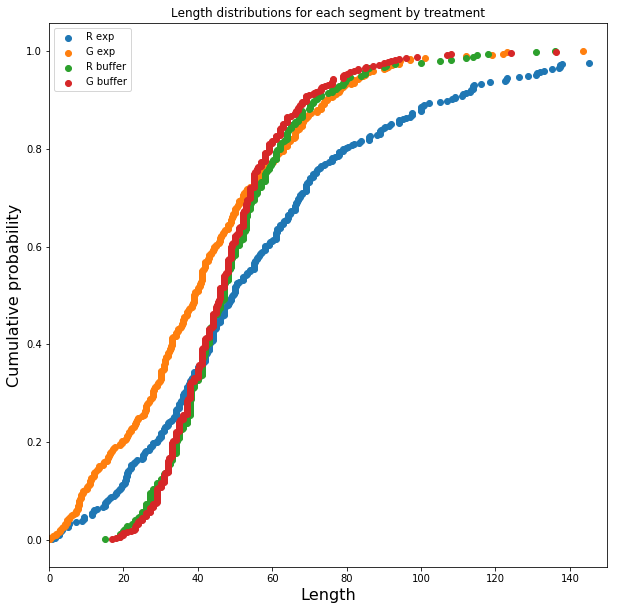

In [20]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntRdexp) #R no treatment digested
plt.scatter(x=x, y=y, label = "R exp")

x,y = ecdf(ntGdexp) #G no treatment digested
plt.scatter(x=x, y=y, label = "G exp")

x,y = ecdf(bR[1]) #R S1
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 150)

plt.show()

In [21]:
ntRdnorm = normdigestGandR(ntR[1], 0, 0.1)
ntGdnorm = normdigestGandR(ntG[1], 0, 0.1)

#normal distribution of breakage, increasing as it gets longer, then decreasing
print("Digestion Efficiency G = ", (len(ntG)/len(ntGdnorm)*100))
print("Digestion Efficiency R = ", (len(ntG)/len(ntGdnorm)*100))

Digestion Efficiency G =  50.27223230490018
Digestion Efficiency R =  50.27223230490018


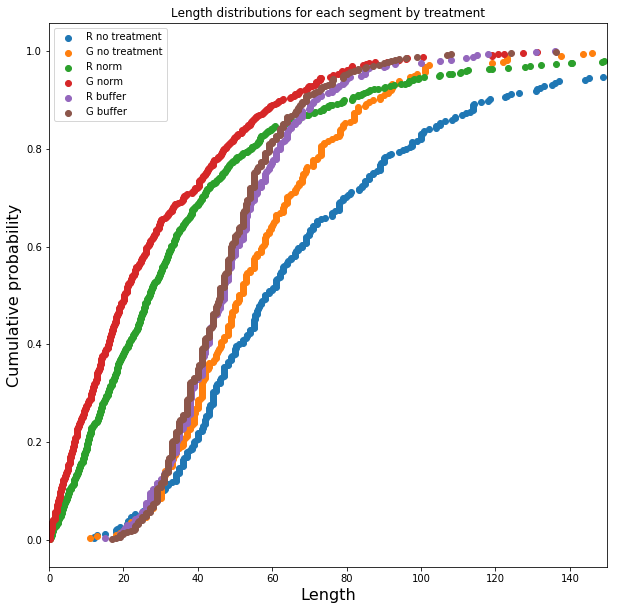

In [22]:
fig1, ax1 = plt.subplots(figsize=(10,10))


x,y = ecdf(ntR[1]) #R no treatment
plt.scatter(x=x, y=y, label = "R no treatment")

x,y = ecdf(ntG[1]) #G no treatment
plt.scatter(x=x, y=y, label = "G no treatment")

x,y = ecdf(ntRdnorm) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm")

x,y = ecdf(ntGdnorm) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm")

x,y = ecdf(bR[1]) #R buffer
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 150)

plt.show()

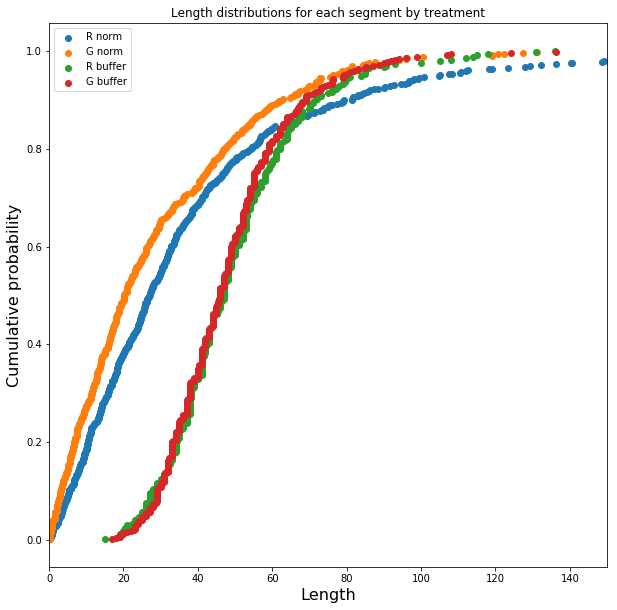

In [23]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntRdnorm) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm")

x,y = ecdf(ntGdnorm) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm")

x,y = ecdf(bR[1]) #R S1
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 150)

plt.show()

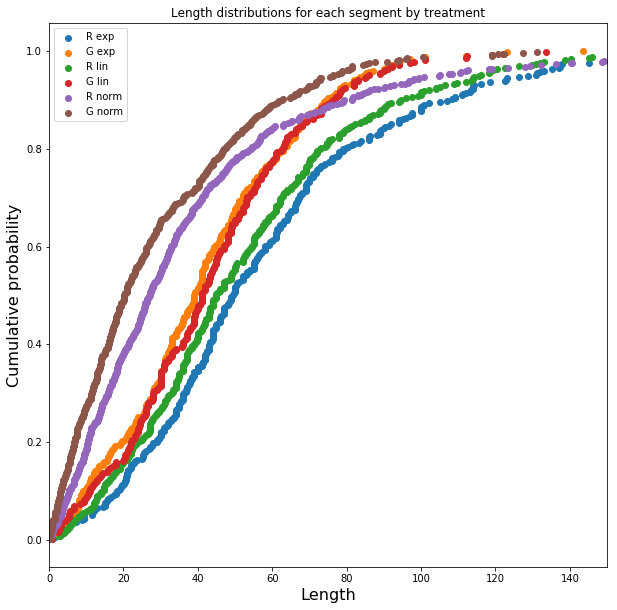

In [24]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntRdexp) #R no treatment digested
plt.scatter(x=x, y=y, label = "R exp")

x,y = ecdf(ntGdexp) #G no treatment digested
plt.scatter(x=x, y=y, label = "G exp")

x,y = ecdf(ntRd) #R no treatment digested exponential
plt.scatter(x=x, y=y, label = "R lin")

x,y = ecdf(ntGd) #G no treatment digested exponential
plt.scatter(x=x, y=y, label = "G lin")

x,y = ecdf(ntRdnorm) #R no treatment digested normal 
plt.scatter(x=x, y=y, label = "R norm")

x,y = ecdf(ntGdnorm) #G no treatment digested normal
plt.scatter(x=x, y=y, label = "G norm")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 150)

plt.show()

In [25]:
ntRdnorm2 = normdigestGandR(ntR[1], 1, 0.1)
ntGdnorm2 = normdigestGandR(ntG[1], 1, 0.1)

#center of bell curve is max value
print("Digestion Efficiency G = ", (len(ntG)/len(ntGdnorm2)*100))
print("Digestion Efficiency R = ", (len(ntG)/len(ntGdnorm2)*100))

Digestion Efficiency G =  99.64028776978418
Digestion Efficiency R =  99.64028776978418


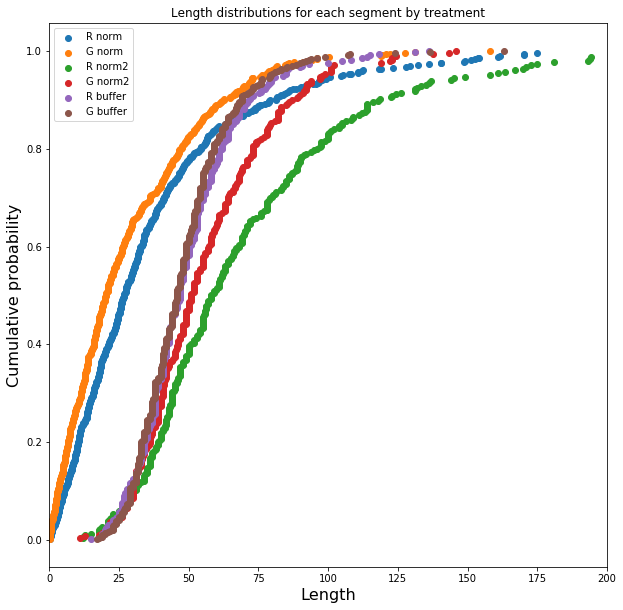

In [26]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntRdnorm) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm")

x,y = ecdf(ntGdnorm) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm")

x,y = ecdf(ntRdnorm2) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm2")

x,y = ecdf(ntGdnorm2) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm2")

x,y = ecdf(bR[1]) #R S1
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 200)

plt.show()

In [27]:
norm2linR = lindigestGandR(ntRdnorm2)
norm2linG = lindigestGandR(ntGdnorm2)

print("Digestion Efficiency G = ", (len(ntG)/len(norm2linG)*100))
print("Digestion Efficiency R = ", (len(ntG)/len(norm2linR)*100))

norm2expR = expdigestGandR(ntRdnorm2, 1)
norm2expG = expdigestGandR(ntGdnorm2, 1)

print("Digestion Efficiency G = ", (len(ntG)/len(norm2expG)*100))
print("Digestion Efficiency R = ", (len(ntG)/len(norm2expR)*100))

Digestion Efficiency G =  78.47025495750708
Digestion Efficiency R =  68.39506172839506
Digestion Efficiency G =  76.94444444444444
Digestion Efficiency R =  74.66307277628033


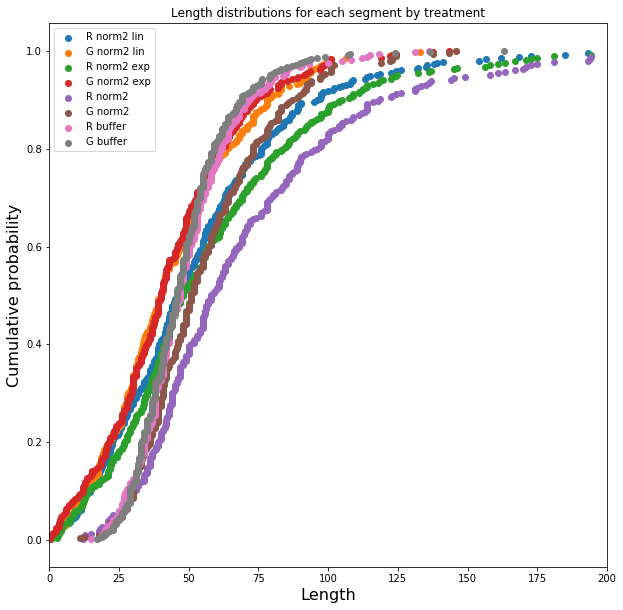

In [28]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(norm2linR) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm2 lin")

x,y = ecdf(norm2linG) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm2 lin")

x,y = ecdf(norm2expR) #R no treatment digested
plt.scatter(x=x, y=y, label = "R norm2 exp")

x,y = ecdf(norm2expG) #G no treatment digested
plt.scatter(x=x, y=y, label = "G norm2 exp")

x,y = ecdf(ntRdnorm2) #G no treatment digested
plt.scatter(x=x, y=y, label = "R norm2 ")

x,y = ecdf(ntGdnorm2) #R no treatment digested
plt.scatter(x=x, y=y, label = "G norm2")

x,y = ecdf(bR[1]) #R S1
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(bG[1]) #G buffer
plt.scatter(x=x, y=y, label = "G buffer")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 200)

plt.show()

In [29]:
ntGRTd = lindigestGRT(ntGRT)

singleGd = pd.Series(ntGd).append(ntGRTd[4].dropna())

singleRd = singleRd = pd.Series(ntRd).append(ntGRTd[5].dropna())

print("Digestion Efficiency = ", (len(ntGRT)/(len(ntGRT)+len(ntGRTd[4].dropna()) + len(ntGRTd[5].dropna()))*100))

#uniform distribution 2 segment, one breakage per pair, same breakage throughout both sides

#print(len(ntGRTd))
#ntGRTd

Digestion Efficiency =  74.24242424242425


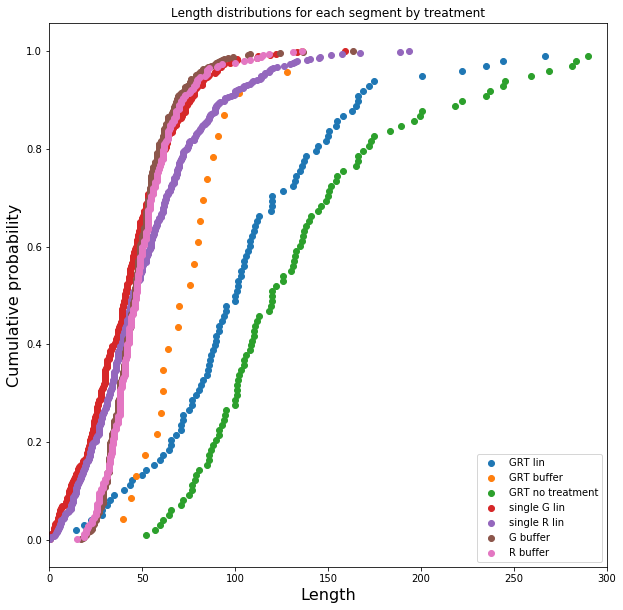

In [30]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd[3]) #combined no treatment
plt.scatter(x=x, y=y, label = "GRT lin")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(ntGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT no treatment")

x,y = ecdf(singleGd) #G no treatment digested single
plt.scatter(x=x, y=y, label = "single G lin")

x,y = ecdf(singleRd) #R no treatment digested single
plt.scatter(x=x, y=y, label = "single R lin")

x,y = ecdf(bG[1]) #G buffer 
plt.scatter(x=x, y=y, label = "G buffer")

x,y = ecdf(bR[1]) #R buffer 
plt.scatter(x=x, y=y, label = "R buffer")



ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')
plt.xlim(0, 300)

plt.show()

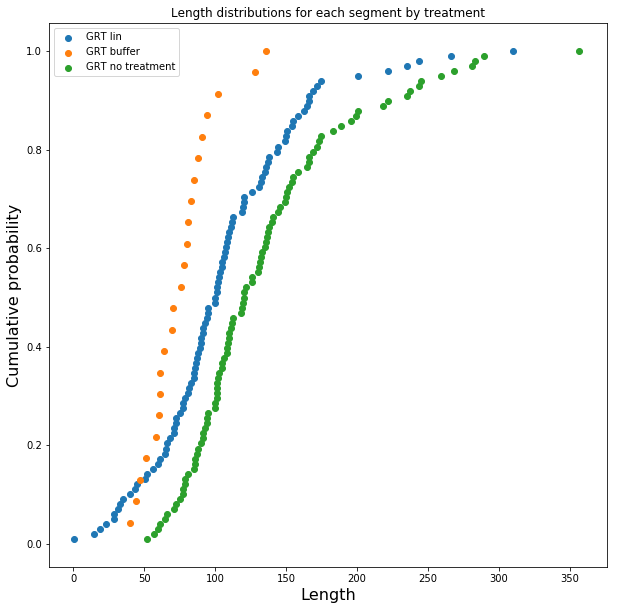

In [31]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd[3]) #combined no treatment lin
plt.scatter(x=x, y=y, label = "GRT lin")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(ntGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

In [32]:
ntGRTd2 = lindigestGRT2(ntGRT)

singleGd2 = pd.Series(ntGd).append(ntGRTd2[4].dropna())

singleRd2 = pd.Series(ntRd).append(ntGRTd2[5].dropna())

#2 seperate digestions, red/green,uniform chance for both
print("Digestion Efficiency = ", (len(ntGRT)/(len(ntGRT)+len(ntGRTd2[4].dropna()) + len(ntGRTd2[5].dropna()))*100))
ntGRTd2;

Digestion Efficiency =  58.68263473053892


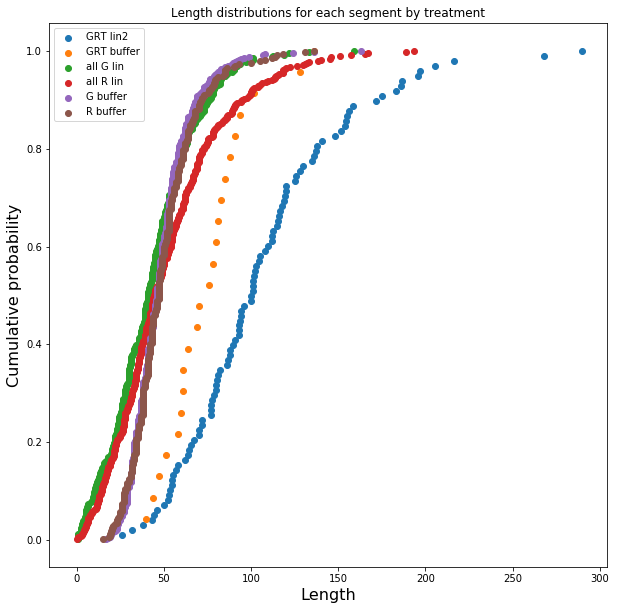

In [33]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd2[3]) #combined no treatment
plt.scatter(x=x, y=y, label = "GRT lin2")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(singleGd2) #G no treatment digested single
plt.scatter(x=x, y=y, label = "all G lin")

x,y = ecdf(singleRd2) #R no treatment digested single
plt.scatter(x=x, y=y, label = "all R lin")

x,y = ecdf(bG[1]) #G buffer 
plt.scatter(x=x, y=y, label = "G buffer")

x,y = ecdf(bR[1]) #R buffer 
plt.scatter(x=x, y=y, label = "R buffer")



ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

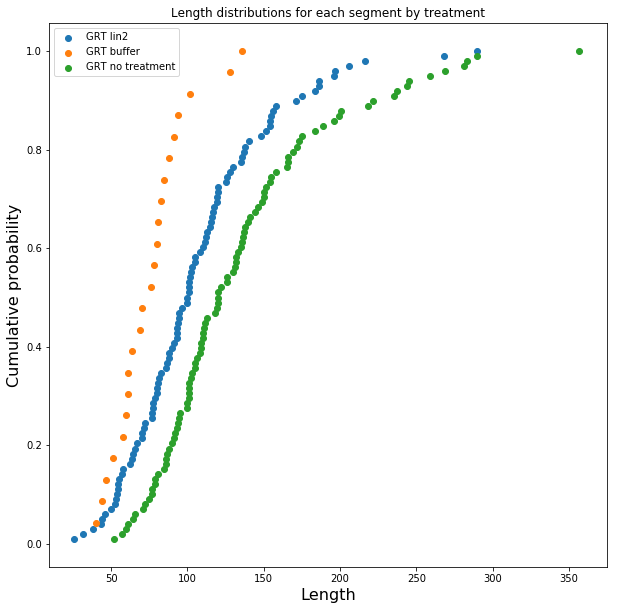

In [34]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd2[3]) #combined no treatment lin
plt.scatter(x=x, y=y, label = "GRT lin2")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(ntGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

In [38]:
ntGRTdnorm = normdigestGRT(ntGRT, 0, 0.1)

singleGd3 = pd.Series(ntGd).append(ntGRTdnorm[4].dropna())

singleRd3 = pd.Series(ntRd).append(ntGRTdnorm[5].dropna())

#combined normal distribution breakage, green and red independant
print("Digestion Efficiency = ", (len(ntGRT)/(len(ntGRT)+len(ntGRTdnorm[4].dropna()) + 
                                              len(ntGRTdnorm[5].dropna()))*100))
ntGRTdnorm;

Digestion Efficiency =  34.146341463414636


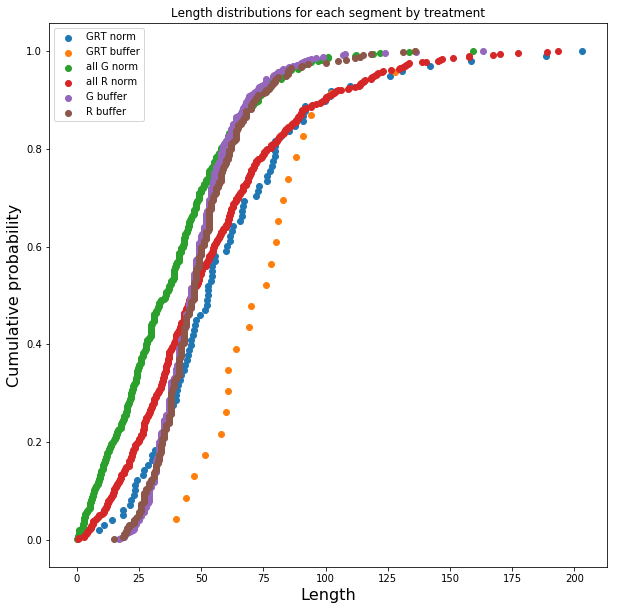

In [39]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTdnorm[3]) #combined no treatment
plt.scatter(x=x, y=y, label = "GRT norm")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(singleGd3) #G no treatment digested single
plt.scatter(x=x, y=y, label = "all G norm")

x,y = ecdf(singleRd3) #R no treatment digested single
plt.scatter(x=x, y=y, label = "all R norm")

x,y = ecdf(bG[1]) #G buffer 
plt.scatter(x=x, y=y, label = "G buffer")

x,y = ecdf(bR[1]) #R buffer 
plt.scatter(x=x, y=y, label = "R buffer")



ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

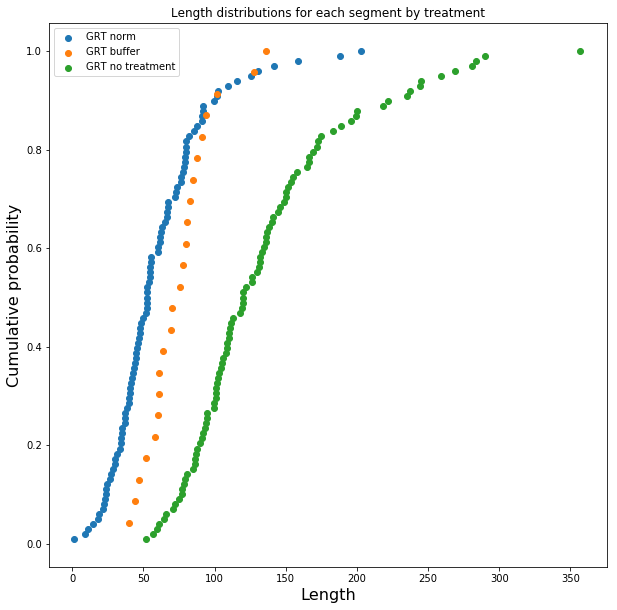

In [40]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTdnorm[3]) #combined no treatment lin
plt.scatter(x=x, y=y, label = "GRT norm")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(ntGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

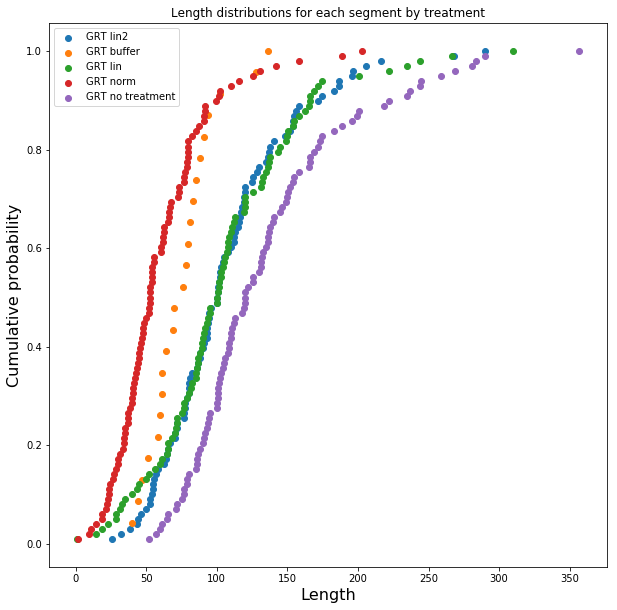

In [41]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd2[3]) #combined no treatment seperate calc
plt.scatter(x=x, y=y, label = "GRT lin2")

x,y = ecdf(bGRT[3]) #combined buffer
plt.scatter(x=x, y=y, label = "GRT buffer")

x,y = ecdf(ntGRTd[3]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "GRT lin")

x,y = ecdf(ntGRTdnorm[3]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "GRT norm")

x,y = ecdf(ntGRT[3]) #combined no treatment
plt.scatter(x=x, y=y, label = "GRT no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for each segment by treatment')


plt.show()

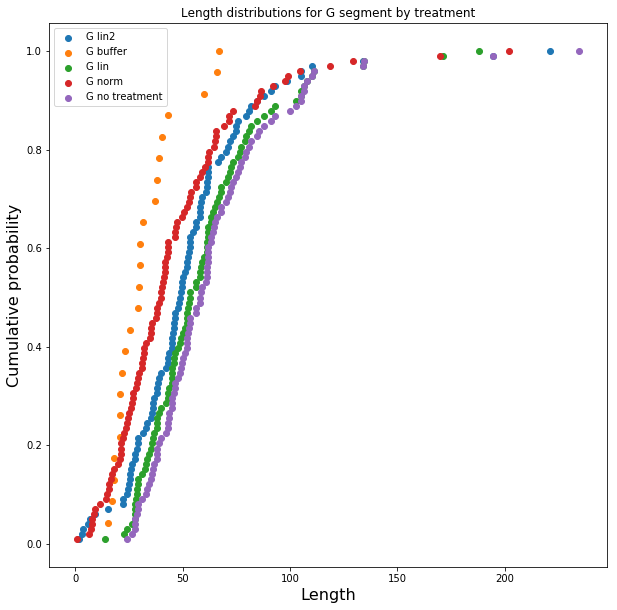

In [42]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd2[1]) #combined no treatment seperate calc
plt.scatter(x=x, y=y, label = "G lin2 ")

x,y = ecdf(bGRT[1]) #combined buffer
plt.scatter(x=x, y=y, label = "G buffer")

x,y = ecdf(ntGRTd[1]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "G lin")

x,y = ecdf(ntGRTdnorm[1]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "G norm")

x,y = ecdf(ntGRT[1]) #combined no treatment
plt.scatter(x=x, y=y, label = "G no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for G segment by treatment')


plt.show()

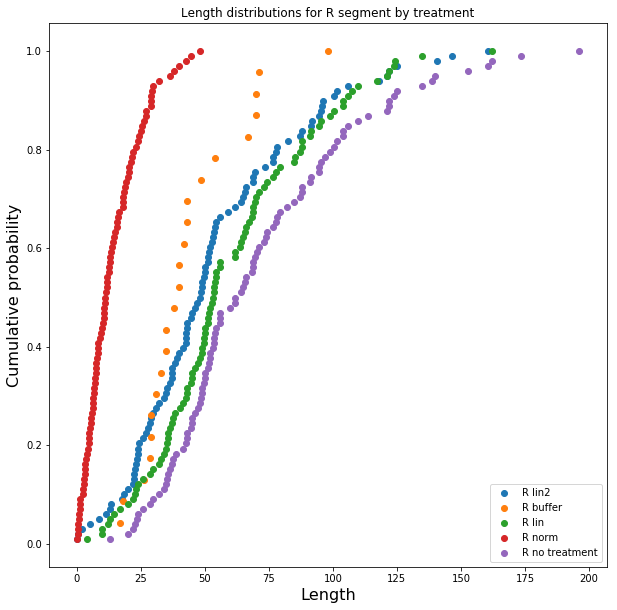

In [43]:
fig1, ax1 = plt.subplots(figsize=(10,10))

x,y = ecdf(ntGRTd2[2]) #combined no treatment seperate calc
plt.scatter(x=x, y=y, label = "R lin2 ")

x,y = ecdf(bGRT[2]) #combined buffer
plt.scatter(x=x, y=y, label = "R buffer")

x,y = ecdf(ntGRTd[2]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "R lin")

x,y = ecdf(ntGRTdnorm[2]) #combined no treatment same time
plt.scatter(x=x, y=y, label = "R norm")

x,y = ecdf(ntGRT[2]) #combined no treatment
plt.scatter(x=x, y=y, label = "R no treatment")

ax1.legend()
plt.xlabel('Length', fontsize=16)
plt.ylabel('Cumulative probability', fontsize=16)
plt.title('Length distributions for R segment by treatment')


plt.show()

In [47]:
ntGRTd;

Text(0.5, 1.0, 'Percentage of each segment type with normal digestion')

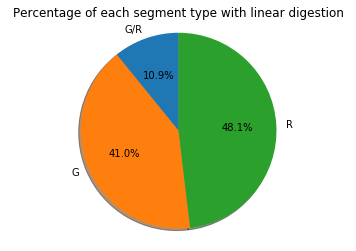

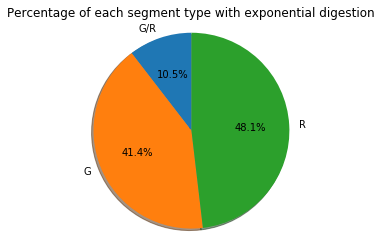

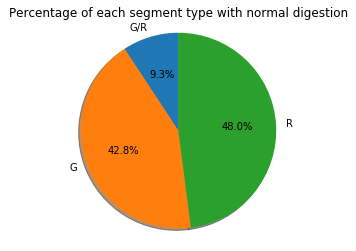

In [50]:
sizes = [ntGRTd[3].count(),singleGd.count(), singleRd.count()]
labels = 'G/R', 'G', 'R'


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type with linear digestion')

sizes = [ntGRTd2[3].count(),singleGd2.count(), singleRd2.count()]
labels = 'G/R', 'G', 'R'


fig1, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type with exponential digestion')

sizes = [ntGRTdnorm[3].count(),singleGd3.count(), singleRd3.count()]
labels = 'G/R', 'G', 'R'


fig1, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of each segment type with normal digestion')

In [5]:
#Generate Table function uniform
def lindigestGandR(data):
    values = data#[1]
    random.seed()
    maxLength = 200#max(values)
    newValues = []
    for i in values:
        breakage = (random.random()*maxLength)
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [6]:
#Generate Table function normal
def normdigestGandR(data, mu, sigma):
    values = data
    random.seed()
    maxLength = max(values)
    newValues = []
    for i in values:
        breakage = (abs(random.normalvariate(mu, sigma)*maxLength))
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [7]:
#Generate Table function triangular
def tridigestGandR(data, low, high):
    values = data[1]
    random.seed()
    maxLength = values.max()
    newValues = []
    for i in values:
        breakage = (random.triangular(low, high, mode)*maxLength)
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [8]:
#Generate Table function, gauss
def guassdigestGandR(data, mu, sigma):
    values = data[1]
    random.seed()
    maxLength = values.max()
    newValues = []
    for i in values:
        breakage = (random.gauss(mu, sigma)*maxLength)
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [9]:
#Generate Table function, beta distribution
def betadigestGandR(data, alpha, beta):
    values = data[1]
    random.seed()
    maxLength = values.max()
    newValues = []
    for i in values:
        breakage = (random.betavariate(alpha, beta)*maxLength)
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [10]:
#Generate Table function, exponential distribution
def expdigestGandR(data, lambd):
    values = data#[1]
    random.seed()
    maxLength = max(values)
    newValues = []
    for i in values:
        breakage = (random.expovariate(1)*maxLength)
        if breakage < i:
            newValues.append(i-breakage)
            newValues.append(breakage)
        else:
            newValues.append(i)
    return newValues

In [11]:
#Generate Table function, uniform
#uniform digestion method (2 sections combined as 1)
def lindigestGRT(data):
    df = data.reset_index(drop=True)
    random.seed()
    maxLength = df[3].max()
    newTotal = []
    newGreen = []
    newRed = []
    newSingRed = []
    newSingGreen = []
    for i in range(len(data)):
        breakage = (random.random()*maxLength)
        if breakage < df[3][i]:
            newTotal.append(df[3][i]-breakage)

            if df[1][i] > breakage:
                newSingGreen.append(breakage)
                newGreen.append(df[1][i] - breakage)
                newRed.append(df[2][i])
                
            else:
                newRed.append(breakage - df[1][i])
                newSingRed.append(df[3][i]-breakage)
                newGreen.append(df[1][i])
                
        else:
            newGreen.append(df[1][i])
            newRed.append(df[2][i])
            newTotal.append(df[3][i])
    
    newValues = pd.DataFrame({1:pd.Series(newGreen), 2:pd.Series(newRed), 3:pd.Series(newTotal), 
                              4:pd.Series(newSingGreen), 5:pd.Series(newSingRed)})
    return newValues

In [12]:
#Generate Table function each side independant, uniform
#uniform digestion method (2 sections independant)
def lindigestGRT2(data):
    df = data.reset_index(drop=True)
    random.seed()
    maxLengthG = df[1].max()
    maxLengthR = df[2].max()
    newTotal = []
    newGreen = []
    newRed = []
    newSingRed = []
    newSingGreen = []
    for i in range(len(data)):
        breakageG = (random.random()*maxLengthG)
        breakageR = (random.random()*maxLengthR)
        
        if breakageG < df[1][i]:
            newSingGreen.append(breakageG)
            newGreen.append(df[1][i]-breakageG)
        else:
            newGreen.append(df[1][i])

        if breakageR < df[2][i]:
            newSingRed.append(df[2][i] - breakageR)
            newRed.append(breakageR)
        else:
            newRed.append(df[2][i])
            
        newTotal.append(newGreen[-1] + newRed[-1])
    
    newValues = pd.DataFrame({1:pd.Series(newGreen), 2:pd.Series(newRed), 3:pd.Series(newTotal), 
                              4:pd.Series(newSingGreen), 5:pd.Series(newSingRed)})
    return newValues

In [13]:
#Generate Table function each side independant, uniform
#normal digestion method (2 sections independant)
def normdigestGRT(data, mu, sigma):
    df = data.reset_index(drop=True)
    random.seed()
    maxLengthG = df[1].max()
    maxLengthR = df[2].max()
    newTotal = []
    newGreen = []
    newRed = []
    newSingRed = []
    newSingGreen = []
    for i in range(len(data)):
        breakageG = abs((random.normalvariate(mu, sigma)*maxLengthG))
        breakageR = abs((random.normalvariate(mu, sigma)*maxLengthR))
        
        if breakageG < df[1][i]:
            newSingGreen.append(breakageG)
            newGreen.append(df[1][i]-breakageG)
        else:
            newGreen.append(df[1][i])

        if breakageR < df[2][i]:
            newSingRed.append(df[2][i] - breakageR)
            newRed.append(breakageR)
        else:
            newRed.append(df[2][i])
            
        newTotal.append(newGreen[-1] + newRed[-1])
    
    newValues = pd.DataFrame({1:pd.Series(newGreen), 2:pd.Series(newRed), 3:pd.Series(newTotal), 
                              4:pd.Series(newSingGreen), 5:pd.Series(newSingRed)})
    return newValues

In [14]:
#Empirical cumulative distribution function
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)